# Trust in the World Analysis

## Overview

Trust in institutions and individuals plays a crucial role in shaping societal outcomes, from economic performance to healthcare outcomes. This research aims to understand the factors that influence trust, and how trust can be improved in order to promote positive change within communities. The results of this research have implications for policymakers, business leaders, and individuals looking to build stronger relationships and more effective systems.
Trust is a fundamental component of human interaction, and plays a critical role in shaping our relationships, communities, and societies. Research on trust allows us to understand how trust is built, maintained, and broken, as well as the consequences of trust and mistrust. This research is essential for developing interventions to improve trust in individuals and institutions, and ultimately leads to a more cohesive and functional society.

The key idea of this research is to understand the factors that influence trust in different institutions and individuals across countries, and how this trust relates to economic and healthcare outcomes.

### Materials used:
   - Welcome Trust & Gallop survey https://wellcome.org/reports/wellcome-global-monitor/2018. Data for countries economics parameters and trust question were used. Level of the trust was calcolated as % of users answered 'A lot' and 'Some' to questions formulated as 'How much do you trust...' for next categories: Goverment, Media, Healthcare, Traditional Medicine, Scientists, Neighbors and NGOs
   - Countries classification by Income level https://data.worldbank.org

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import plotly.express as px
from scipy.stats import pearsonr

In [2]:
cwd = os.getcwd()
print(cwd)

/Users/klynete/Desktop/Springboard/Wellcome trust


In [3]:
countries=pd.read_csv(f'{cwd}/data/countries_health_data.csv', names=['Country', 'Data', 'Value'], header=None)

In [4]:
# Reshape to wide table
countries_p=pd.pivot(countries, index='Country', columns='Data', values='Value').reset_index()

In [5]:
countries_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 7 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country                                                                141 non-null    object 
 1   GDP per capita in PPP, international current dollars (World Bank)      141 non-null    float64
 2   GINI coefficient, most recent value                                    131 non-null    float64
 3   Life expectancy from birth (WB)                                        141 non-null    float64
 4   Mortality rate per live 1000 births, most recent value                 141 non-null    float64
 5   Number of researchers working in R & D per million, most recent value  117 non-null    float64
 6   Research and development as percentage of GDP, most recent value       110 non-null    floa

In [6]:
columns_mapping={countries_p.columns[1]:'GDP',
                countries_p.columns[2]:'GINI',
                countries_p.columns[3]:'Life_exp',
                countries_p.columns[4]:'Mort_per_1000',
                countries_p.columns[5]:'Research_per_mil',
                countries_p.columns[6]:'Research_%_GDP'}
countries_p.rename(columns=columns_mapping, inplace=True)
countries_p.head()

Data      Country       GDP  GINI  Life_exp  Mort_per_1000  Research_per_mil  \
0     Afghanistan   1972.18   NaN     63.67          51.50               NaN   
1         Albania  12943.46  29.0     78.35           7.80            156.10   
2         Algeria  15260.35  27.6     76.08          20.60            168.02   
3       Argentina  20784.77  42.4     76.58           9.19           1220.00   
4         Armenia   9647.49  32.5     74.62          11.30               NaN   

Data  Research_%_GDP  
0                NaN  
1               0.15  
2               0.07  
3               0.63  
4                NaN

In [7]:
wgm=pd.read_csv(f'{cwd}/data/wgm2018.csv')
wgm.head()

Country Name Question Number                                Question  \
0  Afghanistan              Q1  Q1 How much do you know about science?   
1  Afghanistan              Q1  Q1 How much do you know about science?   
2  Afghanistan              Q1  Q1 How much do you know about science?   
3  Afghanistan              Q1  Q1 How much do you know about science?   
4  Afghanistan              Q1  Q1 How much do you know about science?   

             Response  Response Total %  
0               A lot                 2  
1                Some                34  
2            Not much                31  
3          Not at all                29  
4  Don't know/refused                 4

In [8]:
#We will use only answers for question related to Trust
trust=wgm[wgm['Question Number'].str.contains('Q11')]
trust.head()

Country Name Question Number  \
39  Afghanistan            Q11A   
40  Afghanistan            Q11A   
41  Afghanistan            Q11A   
42  Afghanistan            Q11A   
43  Afghanistan            Q11B   

                                             Question    Response  \
39  Q11A How much do you trust people in your neig...       A lot   
40  Q11A How much do you trust people in your neig...        Some   
41  Q11A How much do you trust people in your neig...    Not much   
42  Q11A How much do you trust people in your neig...  Not at all   
43  Q11B How much do you trust this country's nati...       A lot   

    Response Total %  
39                53  
40                41  
41                 4  
42                 1  
43                18

In [9]:
trust.Question.unique()

array(['Q11A How much do you trust people in your neighbourhood?',
       "Q11B How much do you trust this country's national government?",
       'Q11C How much do you trust scientists in this country?',
       'Q11D How much do you trust journalists in this country?',
       'Q11E How much do you trust doctors & nurses in this country?',
       'Q11F How much do you trust NGO workers in this country?',
       'Q11G How much do you trust traditional healers in this country?'],
      dtype=object)

In [10]:
# create mapping
questions={'Q11A':'Neighbors', 'Q11B':'Govt', 'Q11C':'Scientists', 'Q11D':'Journalists', 'Q11E':'Doctors', 
           'Q11F':'NGO', 'Q11G':'Healers'}
trust['Question Number'].replace(questions, inplace=True)
trust['Question Number'].unique()

/var/folders/gf/r8gtx_xx1lx_1z6ysyp27n1c0000gp/T/ipykernel_81941/3331169758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust['Question Number'].replace(questions, inplace=True)


array(['Neighbors', 'Govt', 'Scientists', 'Journalists', 'Doctors', 'NGO',
       'Healers'], dtype=object)

In [11]:
trust['Response'].unique()

array(['A lot', 'Some', 'Not much', 'Not at all', "Don't know/refused"],
      dtype=object)

In [12]:
trust.drop(columns='Question', inplace=True)

/var/folders/gf/r8gtx_xx1lx_1z6ysyp27n1c0000gp/T/ipykernel_81941/2040893810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust.drop(columns='Question', inplace=True)


In [13]:
trust.rename(columns={'Country Name':'Country','Question Number':'Q'}, inplace=True)
trust.head()

/var/folders/gf/r8gtx_xx1lx_1z6ysyp27n1c0000gp/T/ipykernel_81941/912071958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust.rename(columns={'Country Name':'Country','Question Number':'Q'}, inplace=True)


Country          Q    Response  Response Total %
39  Afghanistan  Neighbors       A lot                53
40  Afghanistan  Neighbors        Some                41
41  Afghanistan  Neighbors    Not much                 4
42  Afghanistan  Neighbors  Not at all                 1
43  Afghanistan       Govt       A lot                18

In [14]:
trust['Value']=trust['Response Total %']/100
trust.drop(columns='Response Total %', inplace=True)

/var/folders/gf/r8gtx_xx1lx_1z6ysyp27n1c0000gp/T/ipykernel_81941/2252565319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust['Value']=trust['Response Total %']/100
/var/folders/gf/r8gtx_xx1lx_1z6ysyp27n1c0000gp/T/ipykernel_81941/2252565319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trust.drop(columns='Response Total %', inplace=True)


In [15]:
trust_clean=trust[trust.Response.str.contains('A lot|Some')]
trust_clean.head()

Country           Q Response  Value
39  Afghanistan   Neighbors    A lot   0.53
40  Afghanistan   Neighbors     Some   0.41
43  Afghanistan        Govt    A lot   0.18
44  Afghanistan        Govt     Some   0.27
47  Afghanistan  Scientists    A lot   0.15

In [16]:
trust_p=pd.pivot_table(trust_clean, index='Country', columns='Q', values='Value', aggfunc='sum').reset_index()

In [17]:
trust_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      144 non-null    object 
 1   Doctors      144 non-null    float64
 2   Govt         134 non-null    float64
 3   Healers      144 non-null    float64
 4   Journalists  144 non-null    float64
 5   NGO          144 non-null    float64
 6   Neighbors    144 non-null    float64
 7   Scientists   144 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.1+ KB


In [18]:
#Load list of countries and their Alpha-3 ISO codes
iso=pd.read_csv(f'{cwd}/data/wikipedia-iso-country-codes.csv', names=['Country', 'A2', 'A3','Num','ISO'], header=None)
iso.drop(columns=['A2', 'Num','ISO'], inplace=True)
# Income level classification for countries from worldbank.org
income=pd.read_csv(f'{cwd}/data/income.csv')

In [19]:
#Join trust dataset and countries
df=pd.merge(pd.merge(pd.merge(trust_p,countries_p, 'left',on='Country'), iso,'left',on='Country'), income, 'left',on='A3')
df.head()

Country  Doctors  Govt  Healers  Journalists   NGO  Neighbors  \
0  Afghanistan     0.73  0.45     0.17         0.67  0.58       0.94   
1      Albania     0.67  0.46     0.42         0.54  0.48       0.66   
2      Algeria     0.64  0.38     0.53         0.41  0.52       0.66   
3    Argentina     0.89  0.32     0.21         0.48  0.57       0.74   
4      Armenia     0.75  0.80     0.43         0.66  0.53       0.80   

   Scientists       GDP  GINI  Life_exp  Mort_per_1000  Research_per_mil  \
0        0.56   1972.18   NaN     63.67          51.50               NaN   
1        0.43  12943.46  29.0     78.35           7.80            156.10   
2        0.60  15260.35  27.6     76.08          20.60            168.02   
3        0.75  20784.77  42.4     76.58           9.19           1220.00   
4        0.71   9647.49  32.5     74.62          11.30               NaN   

   Research_%_GDP   A3 Income_rating  
0             NaN  AFG             L  
1            0.15  ALB            UM  
2            0.07  DZA            UM  
3            0.63  ARG            UM  
4             NaN  ARM            LM

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           144 non-null    object 
 1   Doctors           144 non-null    float64
 2   Govt              134 non-null    float64
 3   Healers           144 non-null    float64
 4   Journalists       144 non-null    float64
 5   NGO               144 non-null    float64
 6   Neighbors         144 non-null    float64
 7   Scientists        144 non-null    float64
 8   GDP               141 non-null    float64
 9   GINI              131 non-null    float64
 10  Life_exp          141 non-null    float64
 11  Mort_per_1000     141 non-null    float64
 12  Research_per_mil  117 non-null    float64
 13  Research_%_GDP    110 non-null    float64
 14  A3                142 non-null    object 
 15  Income_rating     142 non-null    object 
dtypes: float64(13), object(3)
memory usage: 19.1

In [21]:
df[df['A3'].isna()]

Country  Doctors  Govt  Healers  Journalists   NGO  Neighbors  \
65           Kosovo     0.76  0.37     0.42         0.63  0.72       0.86   
97  Northern Cyprus     0.78  0.49     0.22         0.51  0.64       0.80   

    Scientists  GDP  GINI  Life_exp  Mort_per_1000  Research_per_mil  \
65        0.55  NaN   NaN       NaN            NaN               NaN   
97        0.73  NaN   NaN       NaN            NaN               NaN   

    Research_%_GDP   A3 Income_rating  
65             NaN  NaN           NaN  
97             NaN  NaN           NaN

In [22]:
df = df[df['A3'].notna()]
df = df[df['GDP'].notna()]

In [23]:
df[df['Govt'].isna()]

Country  Doctors  Govt  Healers  Journalists   NGO  Neighbors  \
19       Cambodia     0.82   NaN     0.72         0.62  0.62       0.72   
24          China     0.78   NaN     0.71         0.58  0.58       0.87   
35          Egypt     0.91   NaN     0.51         0.28  0.55       0.89   
66         Kuwait     0.74   NaN     0.42         0.37  0.54       0.71   
68           Laos     0.81   NaN     0.64         0.62  0.42       0.65   
110  Saudi Arabia     0.84   NaN     0.45         0.46  0.69       0.81   
124    Tajikistan     0.94   NaN     0.55         0.70  0.53       0.87   
131  Turkmenistan     0.92   NaN     0.48         0.64  0.78       0.83   
132           UAE     0.77   NaN     0.40         0.48  0.64       0.69   
140       Vietnam     0.83   NaN     0.45         0.41  0.49       0.75   

     Scientists       GDP  GINI  Life_exp  Mort_per_1000  Research_per_mil  \
19         0.58   4009.06   NaN     68.98           25.1             30.37   
24         0.77  16806.74  42.2     76.25            8.0           1205.68   
35         0.66  11583.79  31.8     71.48           18.8            680.30   
66         0.49  71943.01   NaN     74.69            6.9            385.69   
68         0.53   7023.37  36.4     66.68           48.6             15.83   
110        0.80  53779.02   NaN     74.56            6.3              0.00   
124        0.82   3194.99  34.0     71.05           29.4               NaN   
131        0.82  17992.77  40.8     67.83           40.6               NaN   
132        0.48  73878.47   NaN     77.26            7.8           2406.57   
140        0.54   6775.83  35.3     76.25           16.7            672.07   

     Research_%_GDP   A3 Income_rating  
19             0.12  KHM            LM  
24             2.11  CHN            UM  
35             0.71  EGY            LM  
66             0.43  KWT             H  
68             0.04  LAO            LM  
110             NaN  SAU             H  
124             NaN  TJK            LM  
131             NaN  TKM            UM  
132            0.99  ARE             H  
140            0.44  VNM            LM

In [24]:
df.describe()

Doctors        Govt     Healers  Journalists         NGO  \
count  141.000000  131.000000  141.000000   141.000000  141.000000   
mean     0.806667    0.519389    0.417943     0.550000    0.563404   
std      0.118663    0.182903    0.171049     0.137566    0.127872   
min      0.430000    0.110000    0.090000     0.120000    0.210000   
25%      0.740000    0.380000    0.300000     0.460000    0.470000   
50%      0.820000    0.500000    0.400000     0.550000    0.570000   
75%      0.910000    0.640000    0.550000     0.640000    0.650000   
max      0.990000    1.000000    0.870000     0.870000    0.860000   

        Neighbors  Scientists            GDP        GINI    Life_exp  \
count  141.000000  141.000000     141.000000  131.000000  141.000000   
mean     0.736028    0.663688   21021.630851   37.428244   72.491206   
std      0.133502    0.158445   20409.370435    7.892492    7.715478   
min      0.310000    0.250000     733.890000   16.600000   51.840000   
25%      0.660000    0.560000    4885.340000   32.350000   66.800000   
50%      0.760000    0.660000   15260.350000   35.900000   74.390000   
75%      0.830000    0.800000   31616.480000   42.400000   78.020000   
max      0.960000    0.940000  103744.760000   63.000000   83.980000   

       Mort_per_1000  Research_per_mil  Research_%_GDP  
count     141.000000        117.000000      110.000000  
mean       20.356170       1705.460085        0.942727  
std        19.132513       2141.939373        0.975981  
min         1.600000          0.000000        0.010000  
25%         4.500000         71.030000        0.255000  
50%        12.500000        671.020000        0.555000  
75%        32.700000       2645.670000        1.277500  
max        81.700000       8250.470000        4.250000

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 143
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           141 non-null    object 
 1   Doctors           141 non-null    float64
 2   Govt              131 non-null    float64
 3   Healers           141 non-null    float64
 4   Journalists       141 non-null    float64
 5   NGO               141 non-null    float64
 6   Neighbors         141 non-null    float64
 7   Scientists        141 non-null    float64
 8   GDP               141 non-null    float64
 9   GINI              131 non-null    float64
 10  Life_exp          141 non-null    float64
 11  Mort_per_1000     141 non-null    float64
 12  Research_per_mil  117 non-null    float64
 13  Research_%_GDP    110 non-null    float64
 14  A3                141 non-null    object 
 15  Income_rating     141 non-null    object 
dtypes: float64(13), object(3)
memory usage: 18.7

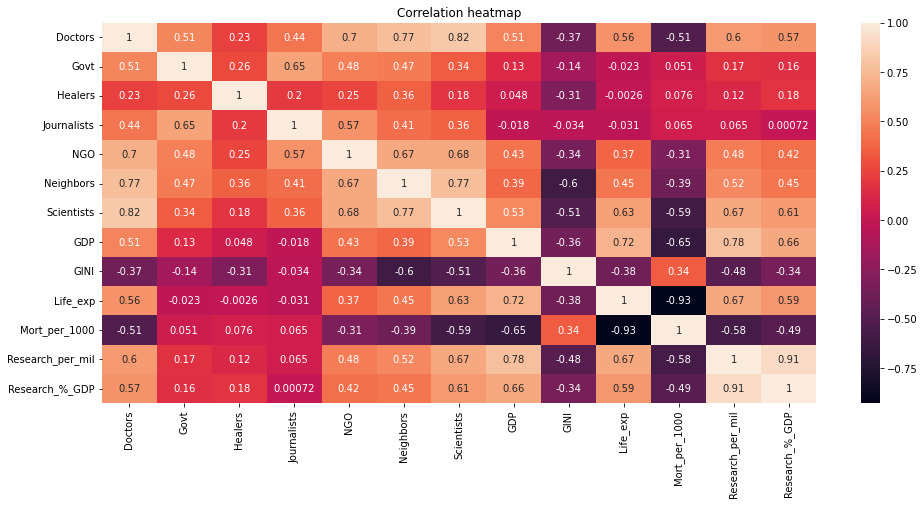

In [26]:
plt.figure(figsize=(16,7))
_=sns.heatmap(df.corr(), annot=True)
_=plt.title('Correlation heatmap')


In [27]:
df['Income_rating'].unique()

array(['L', 'UM', 'LM', 'H'], dtype=object)

In [28]:
order=['L','LM','UM','H']

In [29]:
# outliers checking
def outliers(df, col, threshold=2):
    # calculate z-scores
    z_scores = (df[col] - np.mean(df[col])) / np.std(df[col])
    # set a threshold for z-scores
    
    # find outliers using the threshold
    outliers = np.where(np.abs(z_scores) > threshold)
    # print the outliers
    print("Outliers for trust in ",col,":\n", df[['Country', col]].iloc[outliers].sort_values(by=col))
    return outliers


We will need to check Pearson correlation coefficient to test the relationship between different columns. The pearsonr() function from the scipy.stats module is used to calculate the correlation coefficient and the associated p-value. Then p-value is checked against the significance level (alpha=0.05) to accept or reject the null hypothesis.

Null hypothesis: There is no relationship between column 1 and 2.
Alternative hypothesis: There is a positive relationship between column 1 and 2.

In [30]:
def corr_hypothesis(df, col1, col2):
    df_corr=df[[col1, col2]].dropna()
    corr, p_value = pearsonr(df_corr[col1], df_corr[col2])
    # print the correlation coefficient and p-value
    print("Correlation coefficient:", corr)
    print("p-value:", p_value)
    if corr>0:
        sign='positive'
    else:
        sign='negative'

    # set the significance level
    alpha = 0.05

    # check if p-value is less than significance level
    if p_value < alpha:
        print("There is a",sign, "relationship between trust in", col1, "and", col2,"(reject null hypothesis)")
    else:
        print("There is no relationship between trust in", col1, "and", col2,"(fail to reject null hypothesis)")


In [31]:
def annotate(df, col1, col2):
    minC1=df['Country'].loc[df[col1]==df[col1].min()].values[0]
    minC2=df['Country'].loc[df[col2]==df[col2].min()].values[0]
    maxC1=df['Country'].loc[df[col1]==df[col1].max()].values[0]
    maxC2=df['Country'].loc[df[col2]==df[col2].max()].values[0]
    plt.text(df[df.Country==minC1][col1],df[df.Country==minC1][col2],minC1, color='black')
    plt.text(df[df.Country==minC2][col1],df[df.Country==minC2][col2],minC2, color='black')
    plt.text(df[df.Country==maxC1][col1]-0.02,df[df.Country==maxC1][col2]+0.02,maxC1, color='black')
    plt.text(df[df.Country==maxC2][col1],df[df.Country==maxC2][col2],maxC2, color='black')

## Trust in government and economic performance

Let's check relations between trust level for Goverment and economic performance for countries by next parameters: GDP per capita, GINI coefficient and grouping by level of income

In [32]:
df[['Country', 'Govt']].sort_values(by='Govt', ascending=False).head(5)

Country  Govt
138  Uzbekistan  1.00
109      Rwanda  0.96
39     Ethiopia  0.93
98       Norway  0.89
125    Tanzania  0.88

In [33]:
df[['Country', 'Govt']].sort_values(by='Govt', ascending=False).dropna().tail(5)

Country  Govt
13   Bosnia Herzegovina  0.21
128                Togo  0.17
46               Greece  0.17
15               Brazil  0.15
136             Ukraine  0.11

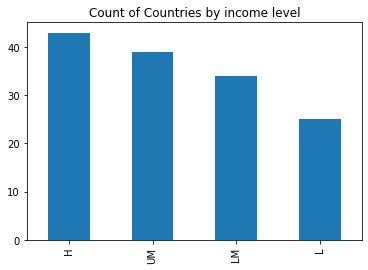

In [34]:
df["Income_rating"].value_counts().plot(kind='bar', title='Count of Countries by income level');

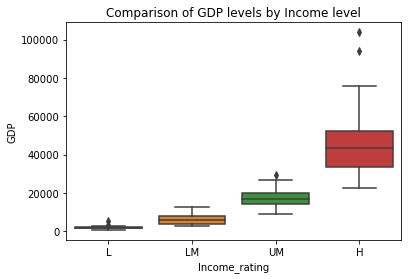

In [35]:
sns.boxplot(x="Income_rating", y="GDP", data=df, order=order).set(title='Comparison of GDP levels by Income level');

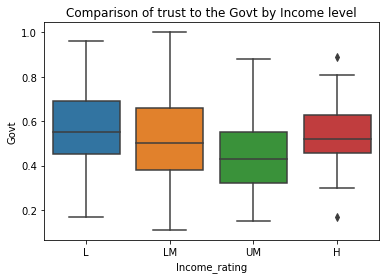

In [36]:
sns.boxplot(x="Income_rating", y="Govt", data=df, order=order).set(title='Comparison of trust to the Govt by Income level');

In [37]:
_=outliers(df[df['Income_rating']=='H'], 'Govt', 2)

Outliers for trust in  Govt :
    Country  Govt
46  Greece  0.17
98  Norway  0.89


In [38]:
_=outliers(df, 'Govt', 2)

Outliers for trust in  Govt :
         Country  Govt
136     Ukraine  0.11
15       Brazil  0.15
98       Norway  0.89
39     Ethiopia  0.93
109      Rwanda  0.96
138  Uzbekistan  1.00


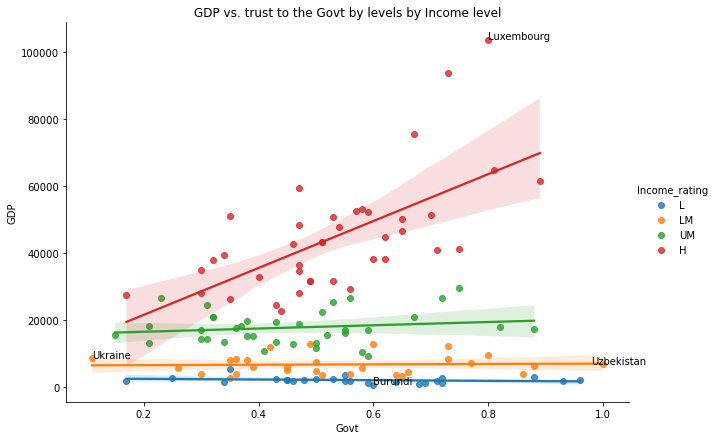

In [39]:
sns.lmplot(data=df, x='Govt', y='GDP', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='GDP vs. trust to the Govt by levels by Income level')
annotate(df,'Govt', 'GDP');

In [40]:
fig = px.choropleth(df, locations="A3",
                    color="Govt", 
                    hover_data=["Country", "GDP"],
                    title="Trust to Goverment among countries",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

In [41]:
corr_hypothesis(df, 'Govt', 'GDP')

Correlation coefficient: 0.12939112160958904
p-value: 0.1407632154674612
There is no relationship between trust in Govt and GDP (fail to reject null hypothesis)


In [42]:
corr_hypothesis(df[df['Income_rating']!='H'], 'Govt', 'GDP')

Correlation coefficient: -0.18341210603148456
p-value: 0.08181539429987811
There is no relationship between trust in Govt and GDP (fail to reject null hypothesis)


In [43]:
corr_hypothesis(df[df['Income_rating']=='H'], 'Govt', 'GDP')

Correlation coefficient: 0.6354687698116404
p-value: 1.055450423882877e-05
There is a positive relationship between trust in Govt and GDP (reject null hypothesis)


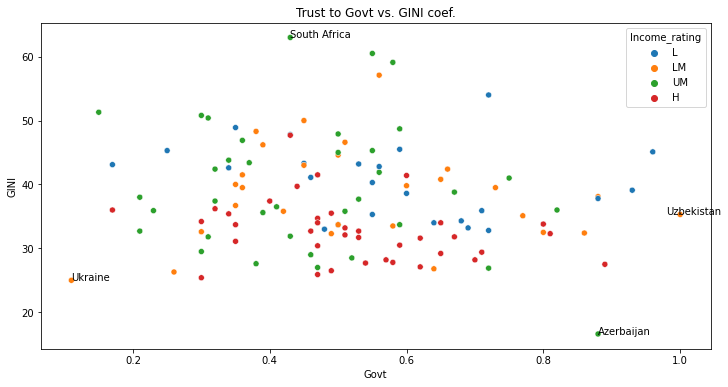

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(ax=ax, x=df['Govt'], y=df['GINI'], hue=df['Income_rating'], hue_order=order).set(title='Trust to Govt vs. GINI coef.')
annotate(df, 'Govt', 'GINI');

In [45]:
corr_hypothesis(df, 'Govt', 'GINI')

Correlation coefficient: -0.1433796120357066
p-value: 0.11067159922250151
There is no relationship between trust in Govt and GINI (fail to reject null hypothesis)


### Summary:
   - The largest group of countries is considered as countries with High income, same time GDP per capita for this group is much wider distributed than for other groups.
   - Among High income countries the lowest level is in Greece - 17% and highest in Norway - 89%
   - The weakest trust in Government is in Ukraine - 11%
   - There is no relationship between trust to Government and GDP as well as between trust to Government and GINI coefficient, but there is positive correlation between trust to Government and GDP among High income countries.

## Trust in the Healthcare and country statistics

Let's investigate how level of trust to healthcare depends on country data related to health level from: Life expectancy, Mortality rate. Also let's consider information regarding trust to Healers and how it is related to above parameters

In [46]:
df[['Country', 'Doctors', 'Income_rating']].sort_values(by='Doctors', ascending=False).head(5)

Country  Doctors Income_rating
98    Norway     0.99             H
119    Spain     0.97             H
32   Denmark     0.97             H
40   Finland     0.97             H
52   Iceland     0.97             H

In [47]:
df[['Country', 'Doctors', 'Income_rating']].sort_values(by='Doctors', ascending=False).tail(5)

Country  Doctors Income_rating
26      Comoros     0.52             L
22         Chad     0.52             L
42        Gabon     0.50            UM
11        Benin     0.50             L
27  Congo, Rep.     0.43             L

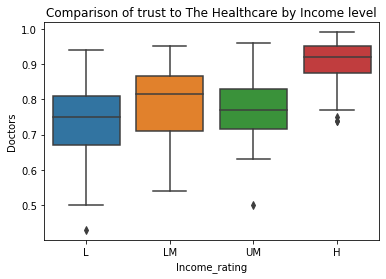

In [48]:
sns.boxplot(x="Income_rating", y="Doctors", data=df, order=order).set(title='Comparison of trust to The Healthcare by Income level');

In [49]:
outl=outliers(df[df['Income_rating']=='H'], 'Doctors', 2)

Outliers for trust in  Doctors :
     Country  Doctors
30   Cyprus     0.74
66   Kuwait     0.74
23    Chile     0.75
132     UAE     0.77


In [50]:
df[df['Income_rating']=='H'][['Country', 'Doctors', 'Life_exp','Mort_per_1000']].iloc[outl]

Country  Doctors  Life_exp  Mort_per_1000
23    Chile     0.75     79.52            6.3
30   Cyprus     0.74     80.51            2.1
66   Kuwait     0.74     74.69            6.9
132     UAE     0.77     77.26            7.8

In [51]:
outl2=outliers(df, 'Doctors', 2)

Outliers for trust in  Doctors :
          Country  Doctors
27   Congo, Rep.     0.43
11         Benin     0.50
42         Gabon     0.50
22          Chad     0.52
26       Comoros     0.52
60   Ivory Coast     0.54
81    Mauritania     0.54
128         Togo     0.54


In [52]:
df[['Country', 'Doctors', 'Life_exp','Mort_per_1000']].iloc[outl2]

Country  Doctors  Life_exp  Mort_per_1000
11         Benin     0.50     60.91           63.5
22          Chad     0.52     52.90           73.4
26       Comoros     0.52     63.70           52.2
27   Congo, Rep.     0.43     64.63           34.7
42         Gabon     0.50     66.11           35.1
60   Ivory Coast     0.54     53.58           64.2
81    Mauritania     0.54     63.24           53.3
128         Togo     0.54     60.23           49.2

In [53]:
fig = px.choropleth(df, locations="A3",
                    color="Doctors", 
                    hover_data=["Mort_per_1000", "Life_exp"],
                    title="Trust to the Healthcare in the World",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

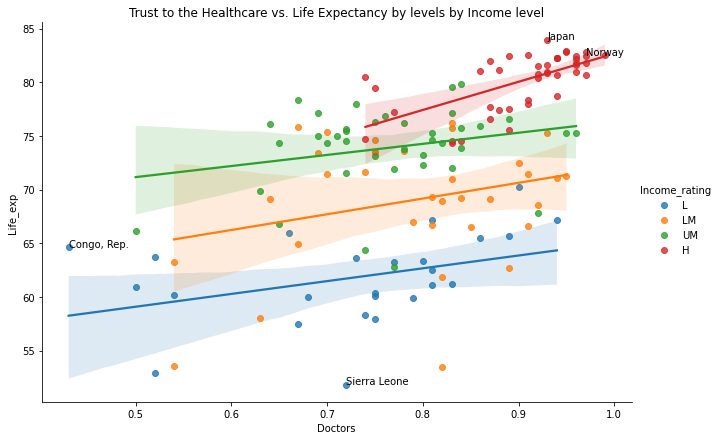

In [54]:
sns.lmplot(data=df, x='Doctors', y='Life_exp', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to the Healthcare vs. Life Expectancy by levels by Income level')
annotate(df, 'Doctors', 'Life_exp');

In [55]:
corr_hypothesis(df, 'Doctors', 'Life_exp')

Correlation coefficient: 0.5634622878942497
p-value: 3.491282410573803e-13
There is a positive relationship between trust in Doctors and Life_exp (reject null hypothesis)


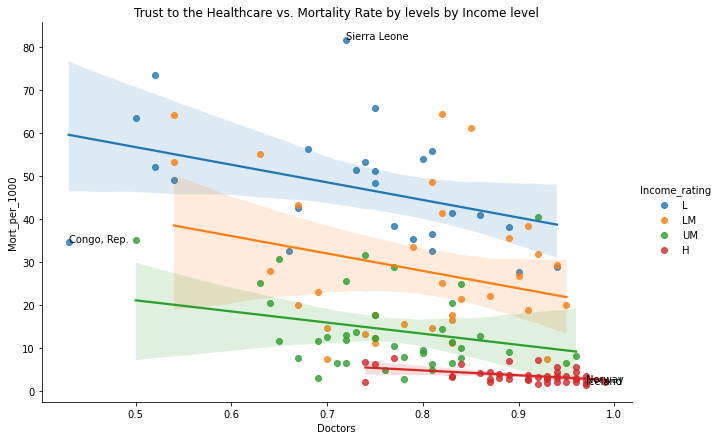

In [56]:
sns.lmplot(data=df, x='Doctors', y='Mort_per_1000', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to the Healthcare vs. Mortality Rate by levels by Income level')
annotate(df, 'Doctors', 'Mort_per_1000');

In [57]:
corr_hypothesis(df, 'Doctors', 'Mort_per_1000')

Correlation coefficient: -0.5137879925129382
p-value: 7.237163236351449e-11
There is a negative relationship between trust in Doctors and Mort_per_1000 (reject null hypothesis)


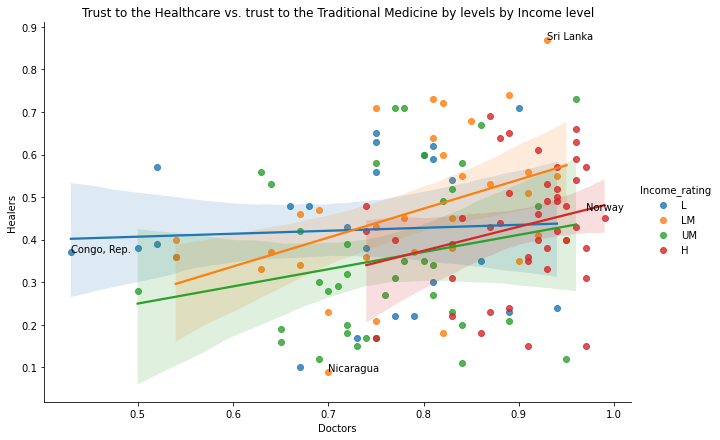

In [58]:
sns.lmplot(data=df, x='Doctors', y='Healers', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to the Healthcare vs. trust to the Traditional Medicine by levels by Income level')
annotate(df, 'Doctors', 'Healers');

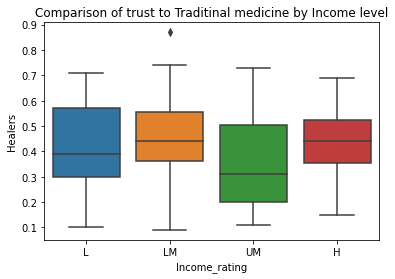

In [59]:
sns.boxplot(x="Income_rating", y="Healers", data=df, order=order).set(title='Comparison of trust to Traditinal medicine by Income level');

In [60]:
_=outliers(df,'Healers',2)

Outliers for trust in  Healers :
        Country  Healers
120  Sri Lanka     0.87


In [61]:
df[['Country', 'Healers']].sort_values(by='Healers', ascending=False).head(5)

Country  Healers
120  Sri Lanka     0.87
45       Ghana     0.74
85    Mongolia     0.73
126   Thailand     0.73
19    Cambodia     0.72

In [62]:
df[['Country', 'Healers']].sort_values(by='Healers', ascending=False).tail(5)

Country  Healers
78             Malaysia     0.12
103                Peru     0.12
33   Dominican Republic     0.11
18              Burundi     0.10
94            Nicaragua     0.09

In [63]:
fig = px.choropleth(df, locations="A3",
                    color="Healers", 
                    hover_data=["Country","Mort_per_1000", "Life_exp"],
                    title="Trust to Healers in the World",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

In [64]:
corr_hypothesis(df[df['Income_rating']!='L'], 'Healers', 'Doctors')

Correlation coefficient: 0.29394208285644874
p-value: 0.00136180315287845
There is a positive relationship between trust in Healers and Doctors (reject null hypothesis)


In [65]:
corr_hypothesis(df[df['Income_rating']=='L'], 'Healers', 'Doctors')

Correlation coefficient: 0.055448555033871916
p-value: 0.7923568940987434
There is no relationship between trust in Healers and Doctors (fail to reject null hypothesis)


### Summary:
   - Trust to healthcare among all countries positively correlated with Life expectancy and negatively correlated with Mortality rate. 
   - Among 5 countries with lowest trust to healthcare, 4 are Low income country group and 1 - Gabon classified as Upper-Middle income group.
   - Trust in traditional medicine have positive relation with trust in healthcare system amond countries that doesn't belong to Low income group.
   - Most strong trust in traditional medicine is in Sri Lanka.

## Trust to the Science and country socioeconomical parameters

In [66]:
pd.DataFrame(df['Scientists']).describe().T

count      mean       std   min   25%   50%  75%   max
Scientists  141.0  0.663688  0.158445  0.25  0.56  0.66  0.8  0.94

In [67]:
df[['Country', 'Scientists', 'Income_rating']].sort_values(by='Scientists', ascending=False).head(5)

Country  Scientists Income_rating
119       Spain        0.94             H
138  Uzbekistan        0.94            LM
52      Iceland        0.93             H
121      Sweden        0.92             H
40      Finland        0.92             H

In [68]:
df[['Country', 'Scientists', 'Income_rating']].sort_values(by='Scientists', ascending=False).tail(5)

Country  Scientists Income_rating
42         Gabon        0.38            UM
27   Congo, Rep.        0.33             L
60   Ivory Coast        0.32            LM
81    Mauritania        0.31            LM
128         Togo        0.25             L

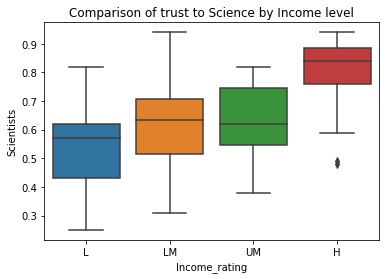

In [69]:
sns.boxplot(x="Income_rating", y="Scientists", data=df, order=order).set(title='Comparison of trust to Science by Income level');

In [70]:
outl=outliers(df[df['Income_rating']=='H'], 'Scientists', 2)

Outliers for trust in  Scientists :
     Country  Scientists
132     UAE        0.48
66   Kuwait        0.49


In [71]:
df[df['Income_rating']=='H'][['Country', 'Scientists', 'Life_exp','Mort_per_1000']].iloc[outl]

Country  Scientists  Life_exp  Mort_per_1000
66   Kuwait        0.49     74.69            6.9
132     UAE        0.48     77.26            7.8

In [72]:
outl2=outliers(df, 'Scientists', 2)

Outliers for trust in  Scientists :
          Country  Scientists
128         Togo        0.25
81    Mauritania        0.31
60   Ivory Coast        0.32
27   Congo, Rep.        0.33


In [73]:
df[['Country', 'Scientists', 'Life_exp','Mort_per_1000']].iloc[outl2]

Country  Scientists  Life_exp  Mort_per_1000
27   Congo, Rep.        0.33     64.63           34.7
60   Ivory Coast        0.32     53.58           64.2
81    Mauritania        0.31     63.24           53.3
128         Togo        0.25     60.23           49.2

In [74]:
fig = px.choropleth(df, locations="A3",
                    color="Scientists", 
                    hover_data=["Mort_per_1000", "Life_exp"],
                    title="Trust to the Science in the World",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

In [75]:
fig = px.choropleth(df, locations="A3",
                    color="Research_%_GDP", 
                    hover_data=["Scientists"],
                    title="% of GDP allocated to scientific research in the World",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

In [76]:
df[['Country', 'Scientists', 'Research_%_GDP', 'Income_rating']].sort_values(by='Research_%_GDP', ascending=False).head(10)

Country  Scientists  Research_%_GDP Income_rating
58        Israel        0.80            4.25             H
118  South Korea        0.80            4.24             H
122  Switzerland        0.91            3.37             H
121       Sweden        0.92            3.25             H
61         Japan        0.86            3.15             H
6        Austria        0.84            3.09             H
44       Germany        0.87            2.94             H
123       Taiwan        0.62            2.93             H
32       Denmark        0.91            2.87             H
40       Finland        0.92            2.75             H

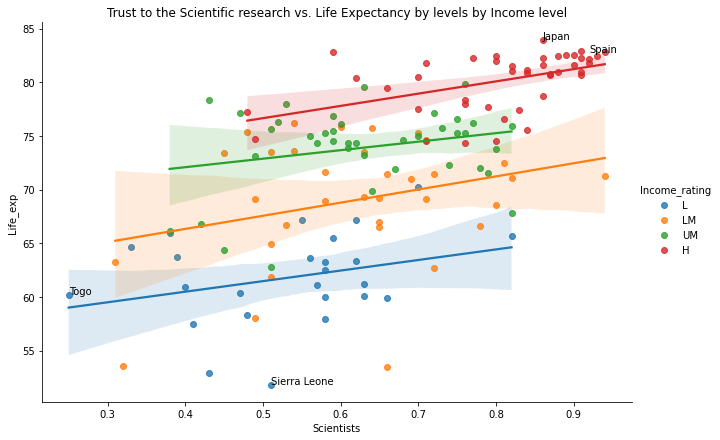

In [77]:
sns.lmplot(data=df, x='Scientists', y='Life_exp', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to the Scientific research vs. Life Expectancy by levels by Income level')
annotate(df, 'Scientists', 'Life_exp');

In [78]:
corr_hypothesis(df, 'Scientists', 'Life_exp')

Correlation coefficient: 0.6281087673093746
p-value: 7.636865020060799e-17
There is a positive relationship between trust in Scientists and Life_exp (reject null hypothesis)


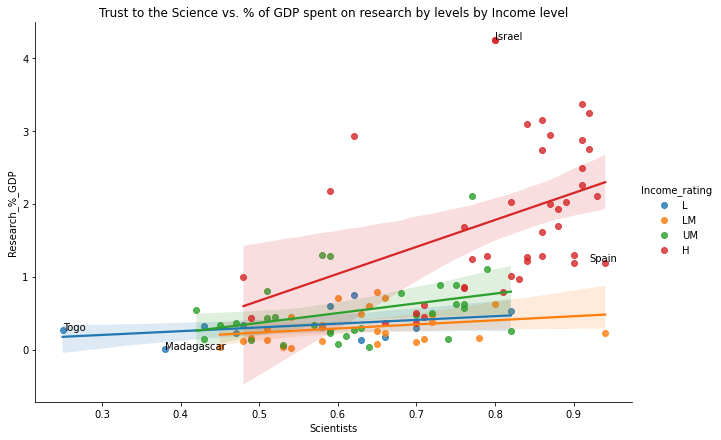

In [79]:
sns.lmplot(data=df, x='Scientists', y='Research_%_GDP', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to the Science vs. % of GDP spent on research by levels by Income level')
annotate(df, 'Scientists', 'Research_%_GDP');

In [80]:
corr_hypothesis(df, 'Scientists', 'Research_%_GDP')

Correlation coefficient: 0.6061625568384486
p-value: 2.263760679418779e-12
There is a positive relationship between trust in Scientists and Research_%_GDP (reject null hypothesis)


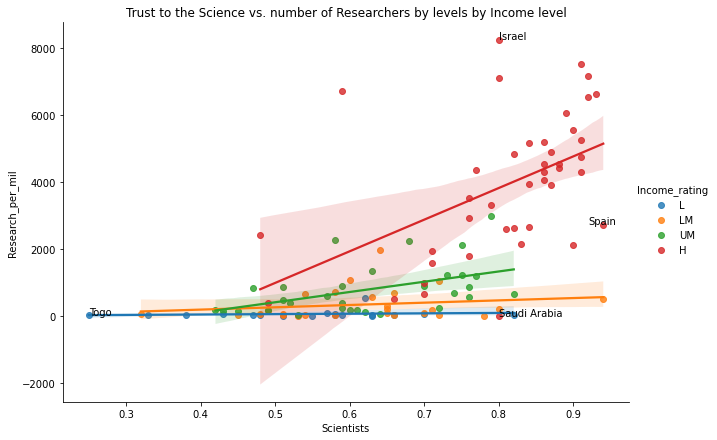

In [81]:
sns.lmplot(data=df, x='Scientists', y='Research_per_mil', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to the Science vs. number of Researchers by levels by Income level')
annotate(df, 'Scientists', 'Research_per_mil');

In [82]:
corr_hypothesis(df, 'Scientists', 'Research_per_mil')

Correlation coefficient: 0.6705835358124781
p-value: 1.3336401615390223e-16
There is a positive relationship between trust in Scientists and Research_per_mil (reject null hypothesis)


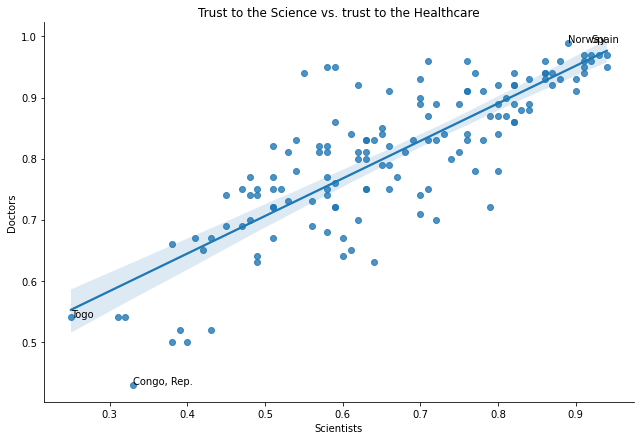

In [83]:
sns.lmplot(data=df, y='Doctors', x='Scientists', height=6, aspect=1.5).set(title='Trust to the Science vs. trust to the Healthcare')
annotate(df, 'Scientists', 'Doctors');

In [84]:
corr_hypothesis(df, 'Scientists','Doctors')

Correlation coefficient: 0.8205731056030681
p-value: 1.3921981121911233e-35
There is a positive relationship between trust in Scientists and Doctors (reject null hypothesis)


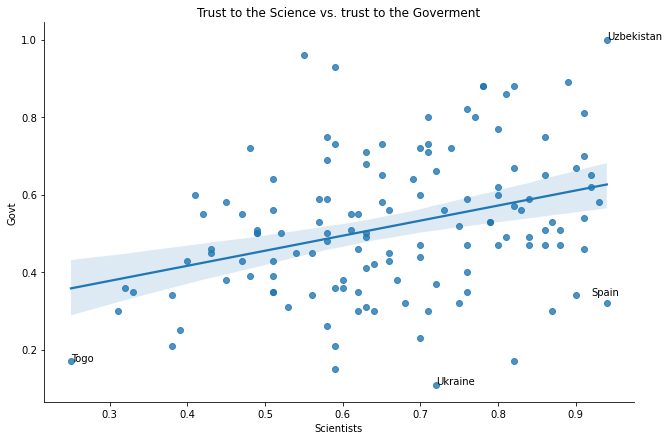

In [85]:
sns.lmplot(data=df, y='Govt', x='Scientists', height=6, aspect=1.5).set(title='Trust to the Science vs. trust to the Goverment')
annotate(df, 'Scientists', 'Govt');

In [86]:
corr_hypothesis(df, 'Scientists','Govt')

Correlation coefficient: 0.3401004546558186
p-value: 7.053789238452155e-05
There is a positive relationship between trust in Scientists and Govt (reject null hypothesis)


## Summary:
   - Average level of trust to the Science around all countries is 66%
   - The most trusting country is Spain with 94%
   - High income countries tent to trust in the Science more than other groups.
   - In general High income countries tend to spend higher % of their GDP for research and have more scientists per million of population.
   - There is strong positive relation between trust to the Science and trust to the Healthcare.
   - Among top 10 countries by % of GDP spent on scientific research, only Taiwan shows trust level of 62% that is less than average for all countries

## Trust in the media, income level and trust in goverment

Let's check how trust in the media disctributed among countries and whether there is relation between it and other parameters for specific country

In [87]:
df[['Country', 'Journalists', 'Income_rating']].sort_values(by='Journalists', ascending=False).head(5)

Country  Journalists Income_rating
138  Uzbekistan         0.87            LM
125    Tanzania         0.86             L
109      Rwanda         0.81             L
40      Finland         0.81             H
126    Thailand         0.79            UM

In [88]:
df[['Country', 'Journalists', 'Income_rating']].sort_values(by='Journalists', ascending=False).tail(5)

Country  Journalists Income_rating
81   Mauritania         0.25            LM
123      Taiwan         0.24             H
112      Serbia         0.23            UM
141       Yemen         0.21            LM
46       Greece         0.12             H

In [89]:
df['Journalists'].describe()

count    141.000000
mean       0.550000
std        0.137566
min        0.120000
25%        0.460000
50%        0.550000
75%        0.640000
max        0.870000
Name: Journalists, dtype: float64

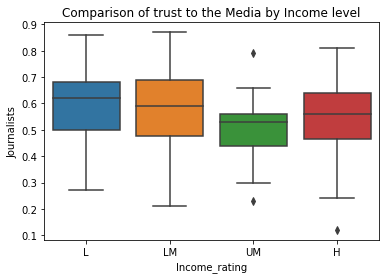

In [90]:
sns.boxplot(x="Income_rating", y="Journalists", data=df, order=order).set(title='Comparison of trust to the Media by Income level');

In [91]:
outl=outliers(df[df['Income_rating']=='H'], 'Journalists', 2)

Outliers for trust in  Journalists :
     Country  Journalists
46   Greece         0.12
123  Taiwan         0.24


In [92]:
outl=outliers(df[df['Income_rating']=='UM'], 'Journalists', 2)

Outliers for trust in  Journalists :
       Country  Journalists
112    Serbia         0.23
42      Gabon         0.30
126  Thailand         0.79


In [93]:
fig = px.choropleth(df, locations="A3",
                    color="Journalists", 
                    hover_data=["Govt"],
                    title="Trust to the Media in the World",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

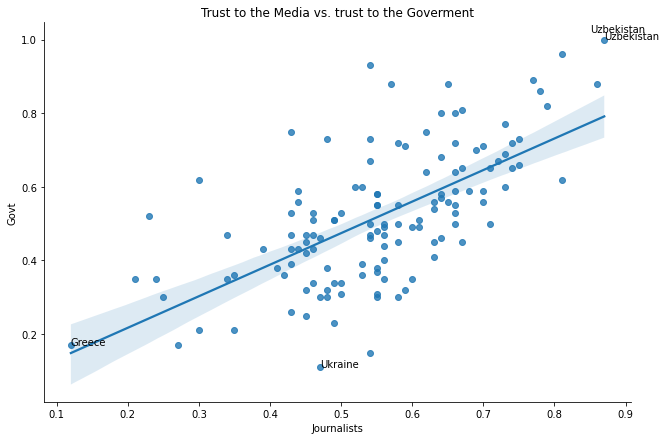

In [94]:
sns.lmplot(data=df, x='Journalists', y='Govt', height=6, aspect=1.5).set(title='Trust to the Media vs. trust to the Goverment')
annotate(df, 'Journalists', 'Govt');

In [95]:
corr_hypothesis(df, 'Govt', 'Journalists')

Correlation coefficient: 0.6459526085072163
p-value: 8.025387716500502e-17
There is a positive relationship between trust in Govt and Journalists (reject null hypothesis)


### Summary:
   - Average level of trust to the Media around all countries is 55%
   - The most strong trust to the Media among High income countries is in Finland (81%), the weakest in Greece (12%) and Taiwan (24%)
   - Among other income level groups of countries the strongest trust is in Uzbekistan (89%), Tanzania (86%) and Rwanda	(81%)
   - There is strong relation between trust to the Media and Trust to the government

## Trust to neighbors and NGO workers

How trust to neighbors and NGO workers is distributed by countries and wheter it has relation to other factors as trust to goverment, trust to healthcare, economic factors.

In [96]:
df[['Neighbors', 'NGO']].describe().T

count      mean       std   min   25%   50%   75%   max
Neighbors  141.0  0.736028  0.133502  0.31  0.66  0.76  0.83  0.96
NGO        141.0  0.563404  0.127872  0.21  0.47  0.57  0.65  0.86

In [97]:
df[['Country', 'Neighbors', 'Income_rating']].sort_values(by='Neighbors', ascending=False).head(5)

Country  Neighbors Income_rating
138   Uzbekistan       0.96            LM
52       Iceland       0.95             H
0    Afghanistan       0.94             L
57       Ireland       0.93             H
121       Sweden       0.92             H

In [98]:
df[['Country', 'Neighbors', 'Income_rating']].sort_values(by='Neighbors', ascending=True).head(5)

Country  Neighbors Income_rating
42         Gabon       0.31            UM
128         Togo       0.32             L
27   Congo, Rep.       0.38             L
14      Botswana       0.38            UM
60   Ivory Coast       0.38            LM

In [99]:
df[['Country', 'NGO', 'Income_rating']].sort_values(by='NGO', ascending=False).head(5)

Country   NGO Income_rating
80         Malta  0.86             H
52       Iceland  0.84             H
93   New Zealand  0.84             H
98        Norway  0.79             H
133           UK  0.78             H

In [100]:
df[['Country', 'NGO', 'Income_rating']].sort_values(by='NGO', ascending=False).tail(5)

Country   NGO Income_rating
27   Congo, Rep.  0.31             L
60   Ivory Coast  0.29            LM
42         Gabon  0.27            UM
128         Togo  0.24             L
46        Greece  0.21             H

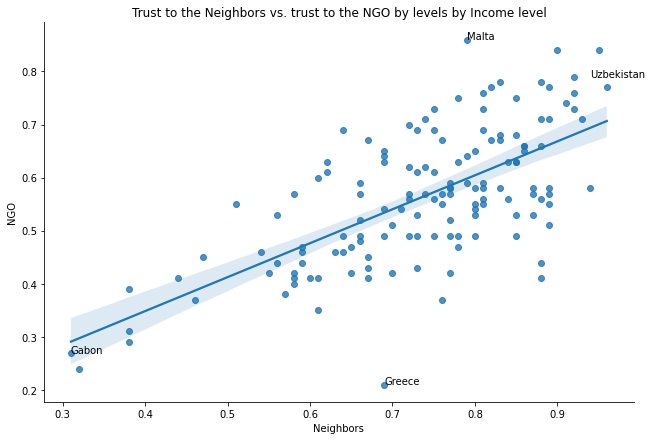

In [101]:
sns.lmplot(data=df, x='Neighbors', y='NGO', height=6, aspect=1.5).set(title='Trust to the Neighbors vs. trust to the NGO by levels by Income level')
annotate(df,'Neighbors','NGO');

In [102]:
corr_hypothesis(df, 'Neighbors', 'NGO')

Correlation coefficient: 0.667756601146115
p-value: 1.5160830804820553e-19
There is a positive relationship between trust in Neighbors and NGO (reject null hypothesis)


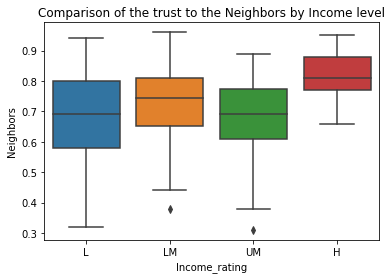

In [103]:
sns.boxplot(x="Income_rating", y="Neighbors", data=df, order=order).set(title='Comparison of the trust to the Neighbors by Income level');

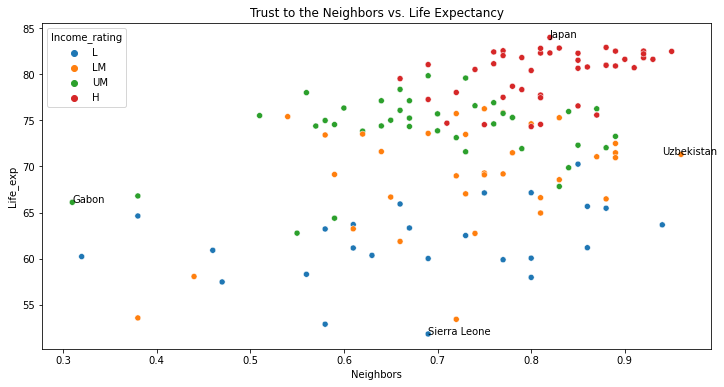

In [104]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df, x='Neighbors', y='Life_exp', hue='Income_rating', hue_order=order, ax=ax).set(title='Trust to the Neighbors vs. Life Expectancy')
annotate(df,'Neighbors','Life_exp');

In [105]:
corr_hypothesis(df, 'Neighbors', 'Life_exp')

Correlation coefficient: 0.44812529281393054
p-value: 2.515872227998503e-08
There is a positive relationship between trust in Neighbors and Life_exp (reject null hypothesis)


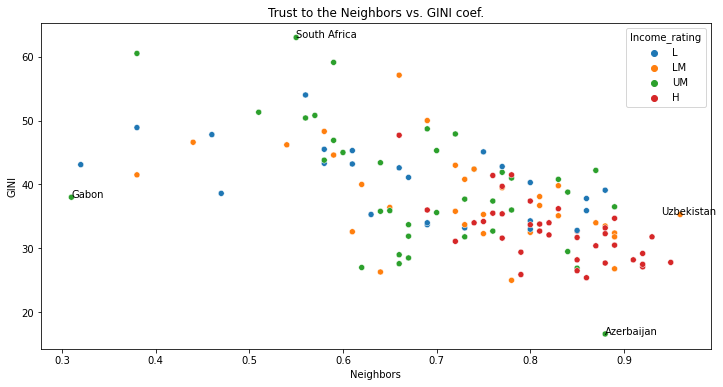

In [106]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(data=df, x='Neighbors', y='GINI', hue='Income_rating', hue_order=order, ax=ax).set(title='Trust to the Neighbors vs. GINI coef.')
annotate(df, 'Neighbors', 'GINI');

In [107]:
corr_hypothesis(df, 'Neighbors', 'GINI')

Correlation coefficient: -0.6027412431798135
p-value: 2.5940100457246183e-14
There is a negative relationship between trust in Neighbors and GINI (reject null hypothesis)


In [108]:
fig = px.choropleth(df, locations="A3",
                    color="Neighbors", 
                    hover_data=["Govt", "NGO", "GINI"],
                    title="Trust to Neighbors in the World",
                    color_continuous_scale=px.colors.diverging.Spectral)
fig.show()

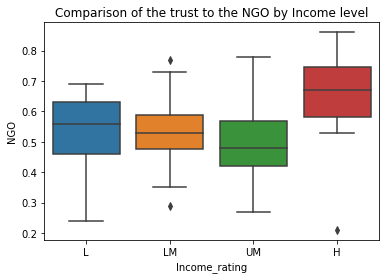

In [109]:
sns.boxplot(x="Income_rating", y="NGO", data=df, order=order).set(title='Comparison of the trust to the NGO by Income level');

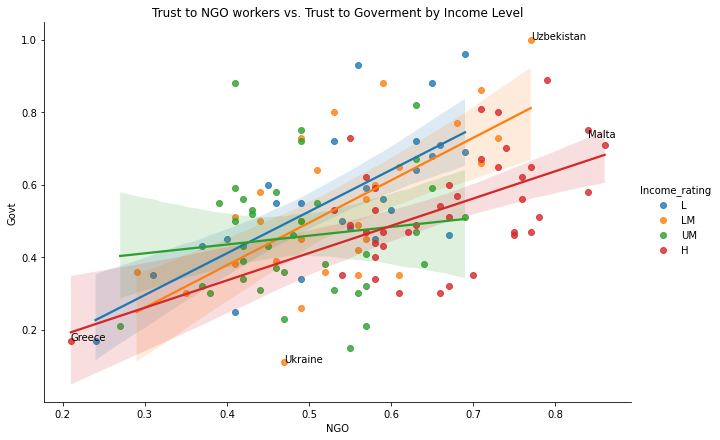

In [110]:
sns.lmplot(data=df, x='NGO', y='Govt', hue='Income_rating', hue_order=order, height=6, aspect=1.5).set(title='Trust to NGO workers vs. Trust to Goverment by Income Level')
annotate(df,'NGO', 'Govt');

### Summary:
   - Average level of trust to the Neighbors around all countries is 74%
   - Same time average level of trust to the NGO workers around all countries is 56%
   - The most strong trust to Neighbors is in Uzbekistan (96%), Iceland (95%) and Afganistan (94%)
   - Top 5 countries with hieghest trust to NGO workers belong to High income group. In general High income countries have higher level of life expecancy and so they tend to trust the NGO workers more.
   - There is strong positive relation between trust to Neighbors and trust to the NGO workers with correlation coefficient of 0.67
   - The more inequality in country the less people tend to trust their neighbors


# Analysis Summary

The research aimed to understand the factors that influence trust in different institutions and individuals across countries, and how this trust relates to economic and healthcare outcomes. The data collected included trust levels in government, scientists, doctors, journalists, neighbors, NGO workers by country and GDP, life expectancy, mortality rate and income group (high, upper-middle, lower-middle andlow).

   - Trust in government varies widely across countries, with the highest levels of trust observed in high-income countries.
   - Trust in healthcare is positively correlated with life expectancy and negatively correlated with mortality rate.
   - Trust in traditional medicine has a positive relationship with trust in healthcare among countries that don't belong to the low-income group.
   - Trust in science depends on the welfare of the country and it's ability to allocate higher level of resources for scientific R&D.
   - Trust in Media and NGO is quite low across the Globe, with an average of 55% and 56% level correspondingly.
   - Trust among people is 74% on average and highly correlated to GINI coeffitient that measures inequality. So the more inequality in the country the less people tend to trust each other.